# Some more features of the BinaryDistillation tool: <br> -Cooling Tower

In [1]:
import pandas as pd
from PIL import Image
import IPython.display as IPdisplay

from AnalyzeVLE import AnalyzeVLE
from BinaryDistillation import BinaryDistillation
from PureComponentData import purecomponentdata


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Creating the VLE object

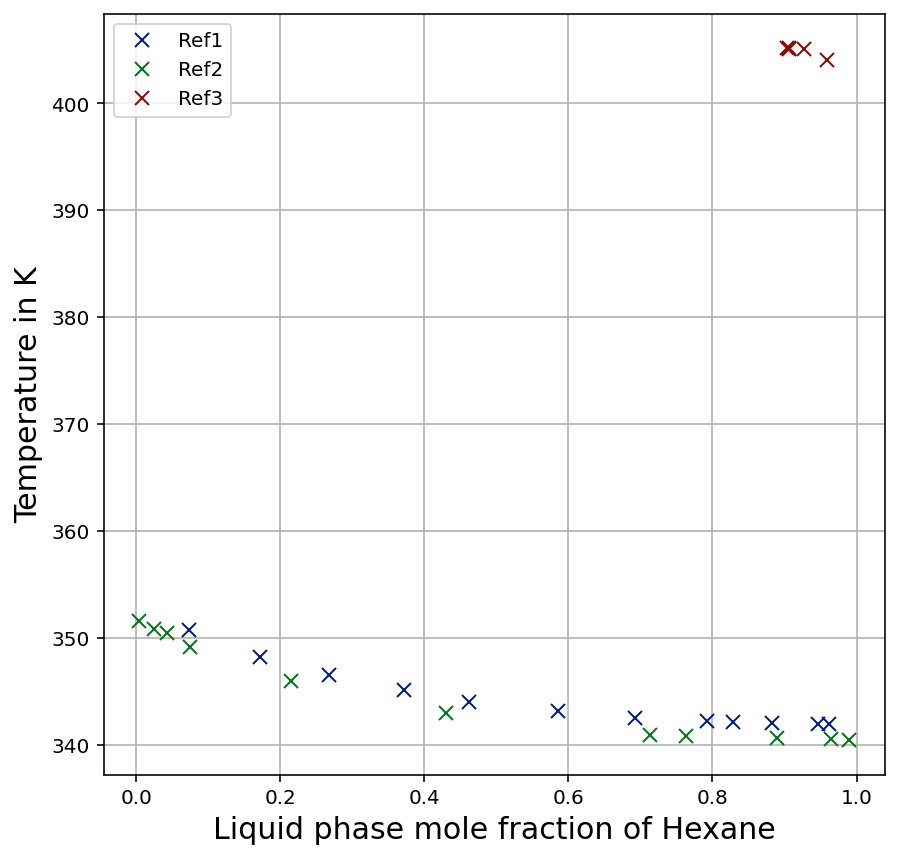

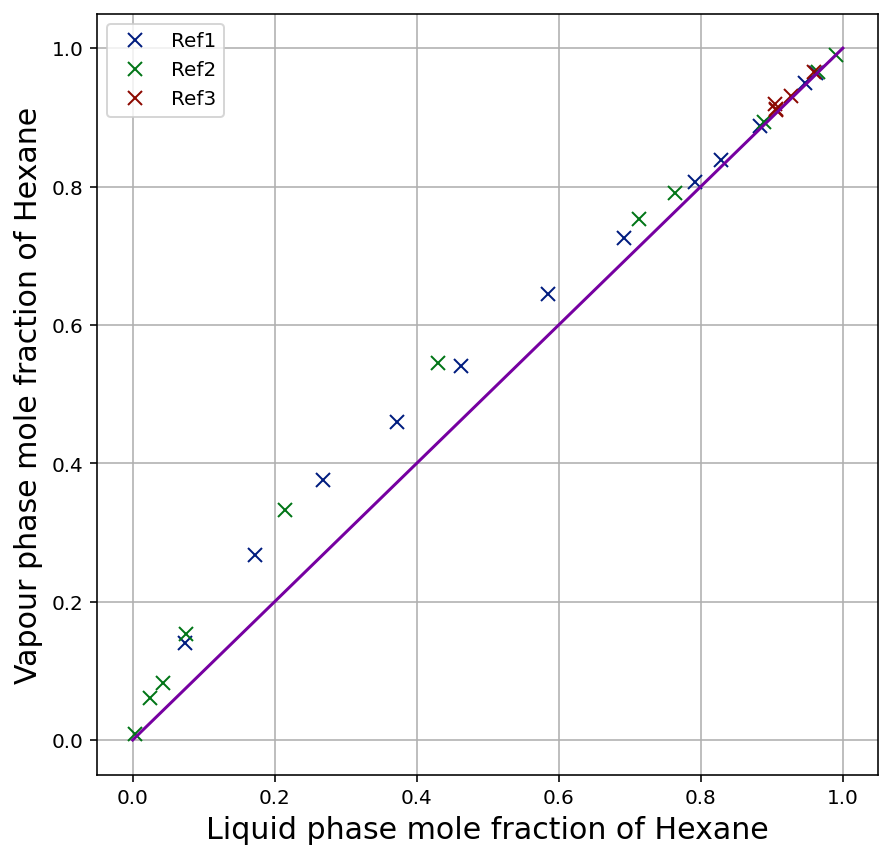

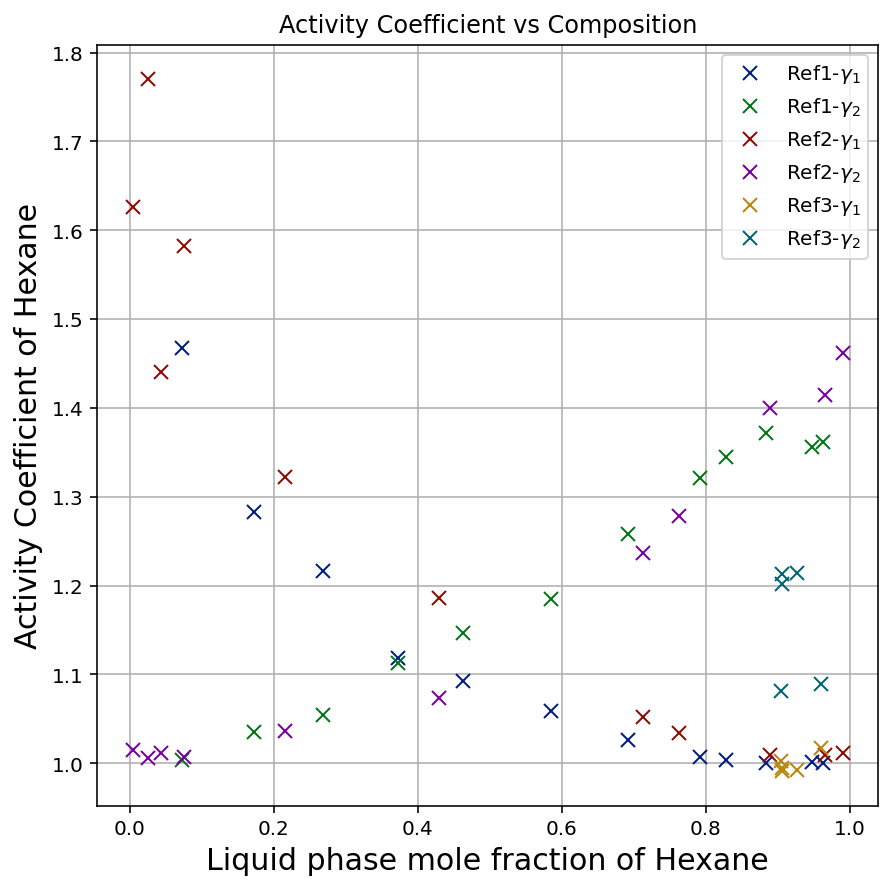

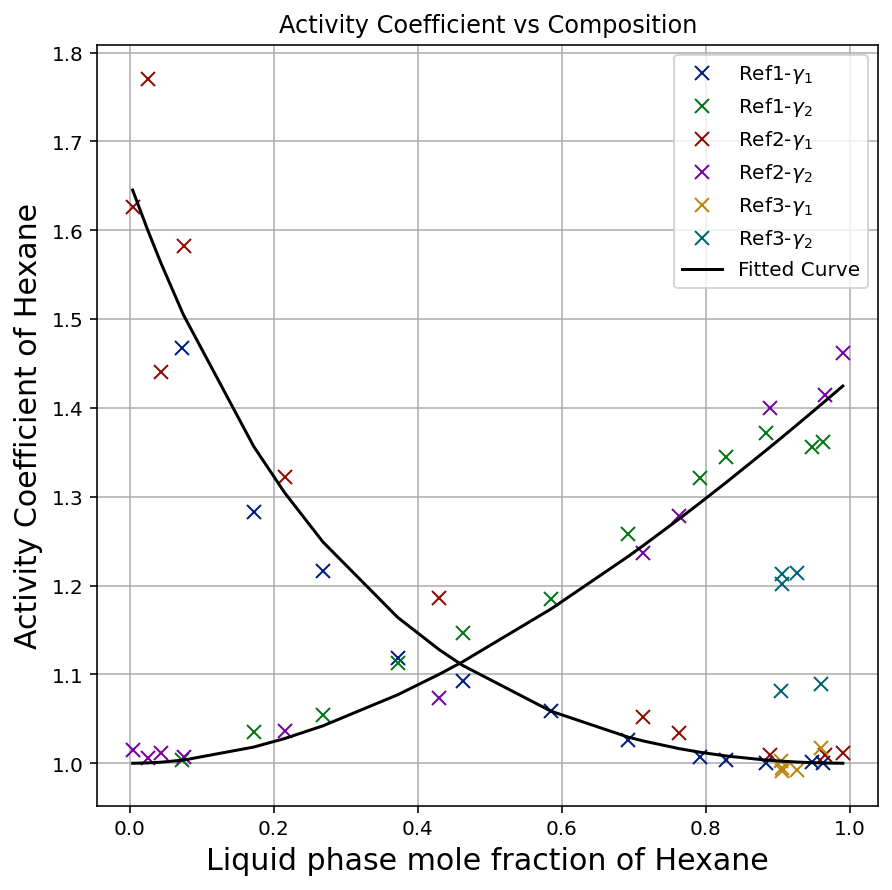

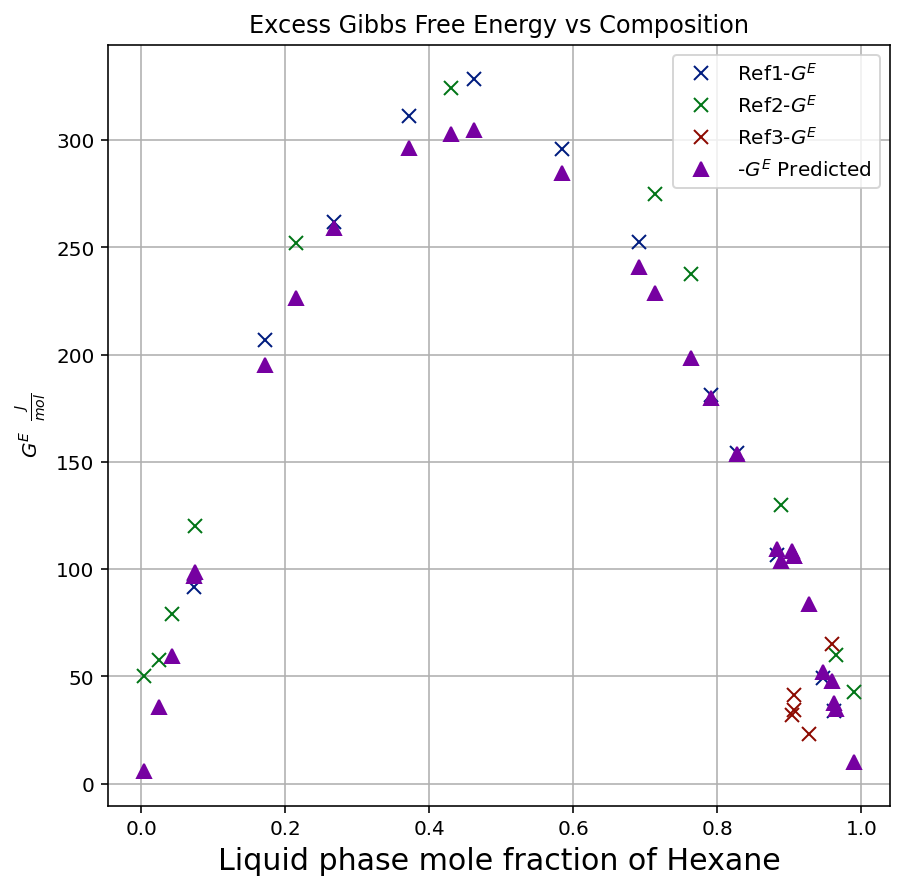

In [2]:
df_vle = pd.read_excel('benzene_hexane_vle.xlsx', usecols = 'A:E')
VLEObj = AnalyzeVLE(['n-Hexane', 'Benzene'], df_vle)
VLEObj.initialize_reading()
VLEObj.process_data()
VLEObj.visualize_data()
VLEObj.get_expt_gamma()
VLEObj.alpha = 0.1
nrtl, params, cost = VLEObj.fit_nrtl()
VLEObj.observe_fit()

In [3]:
Hexane = purecomponentdata.Compound("n-Hexane")  # More volatile component, (1)
Benzene = purecomponentdata.Compound("Benzene")  # Lesser volatile component, (2)

dict_compounds = {"Hexane":Hexane, "Benzene":Benzene} # Define the dictionary

In [4]:
dist = BinaryDistillation(nrtl, dict_compounds)
dist.xd = 0.8
dist.xf = 0.5
dist.q = 1
dist.R = 5

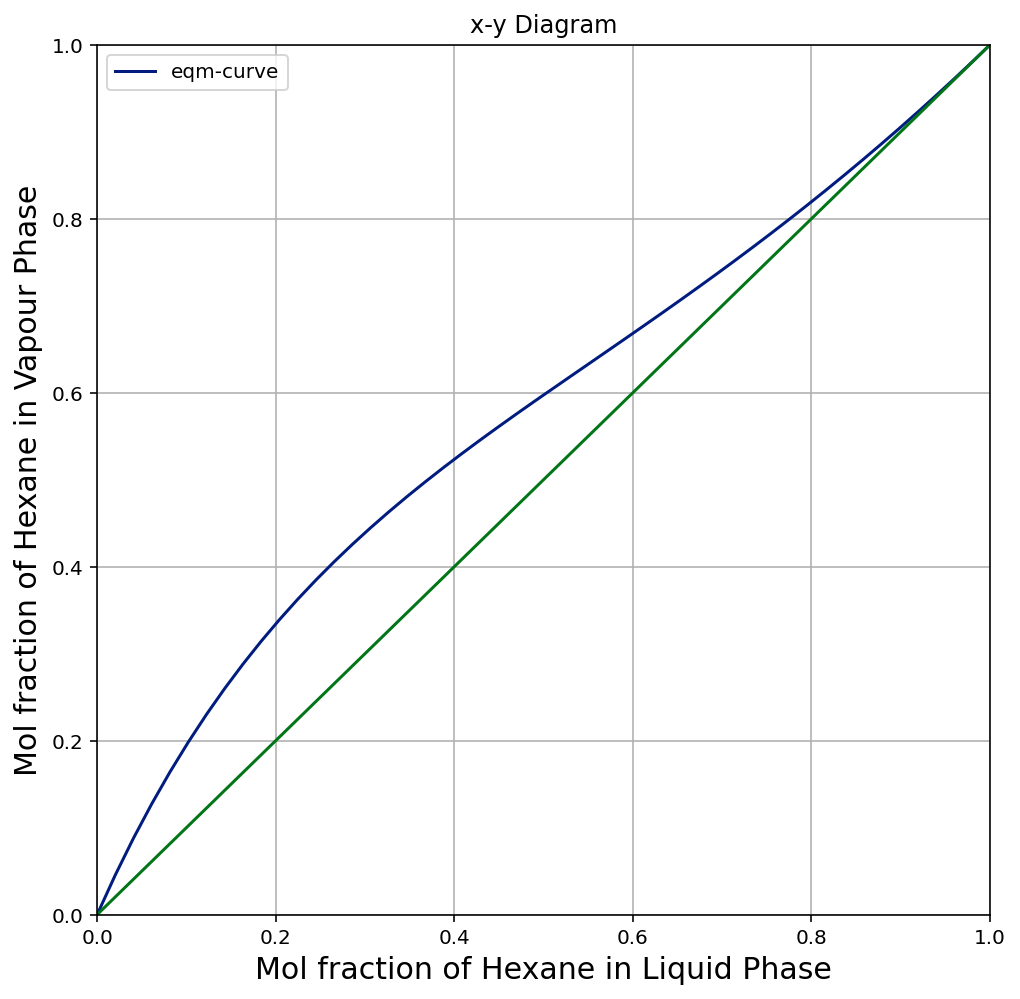

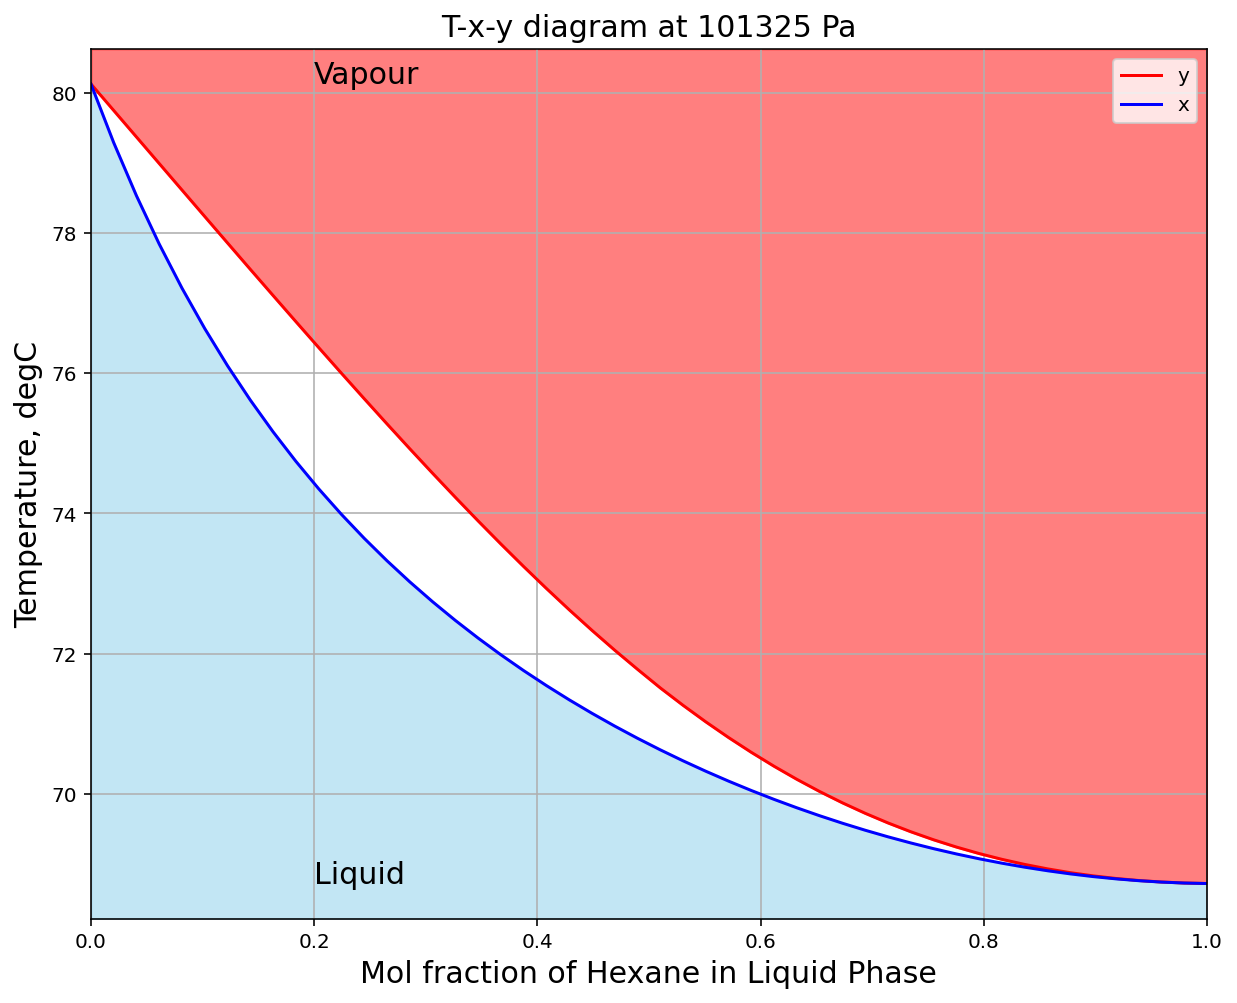

In [5]:
dist.show_xy()
dist.show_txy()

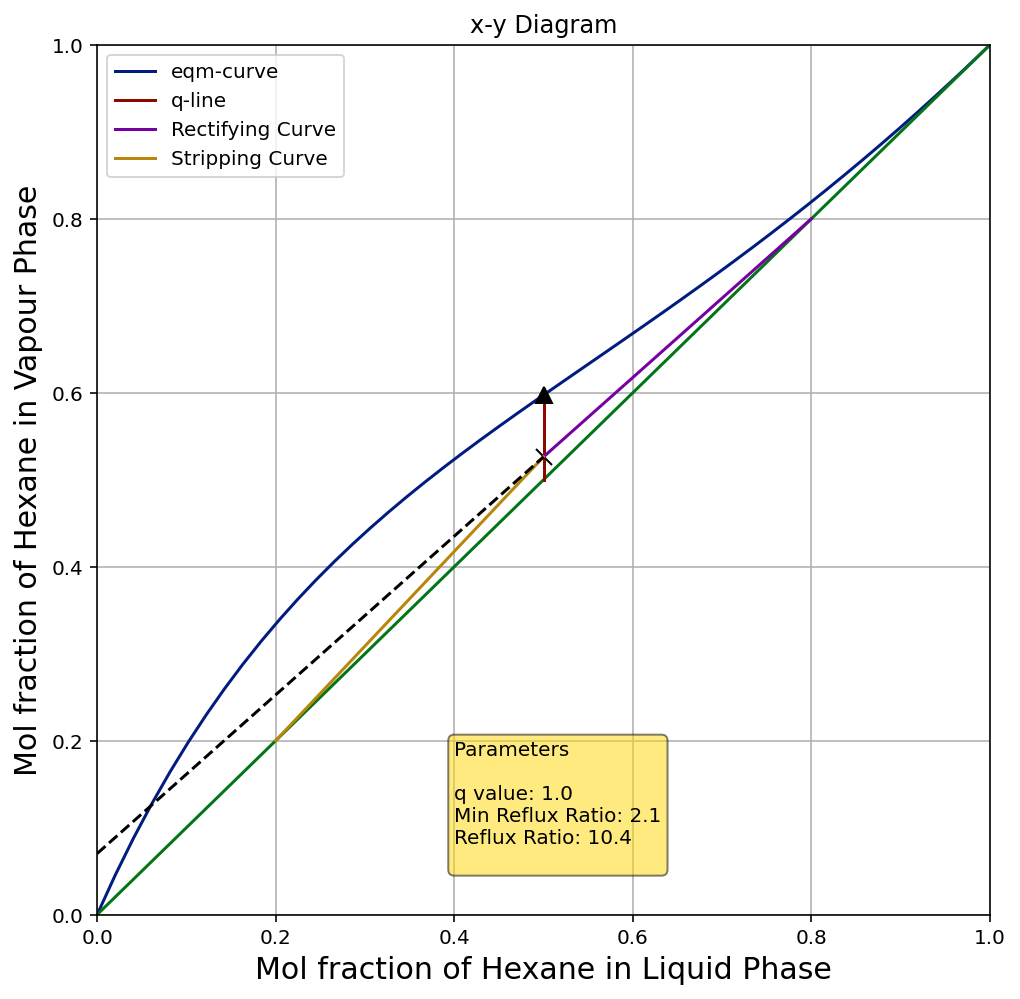

In [6]:
dist.show_opline()

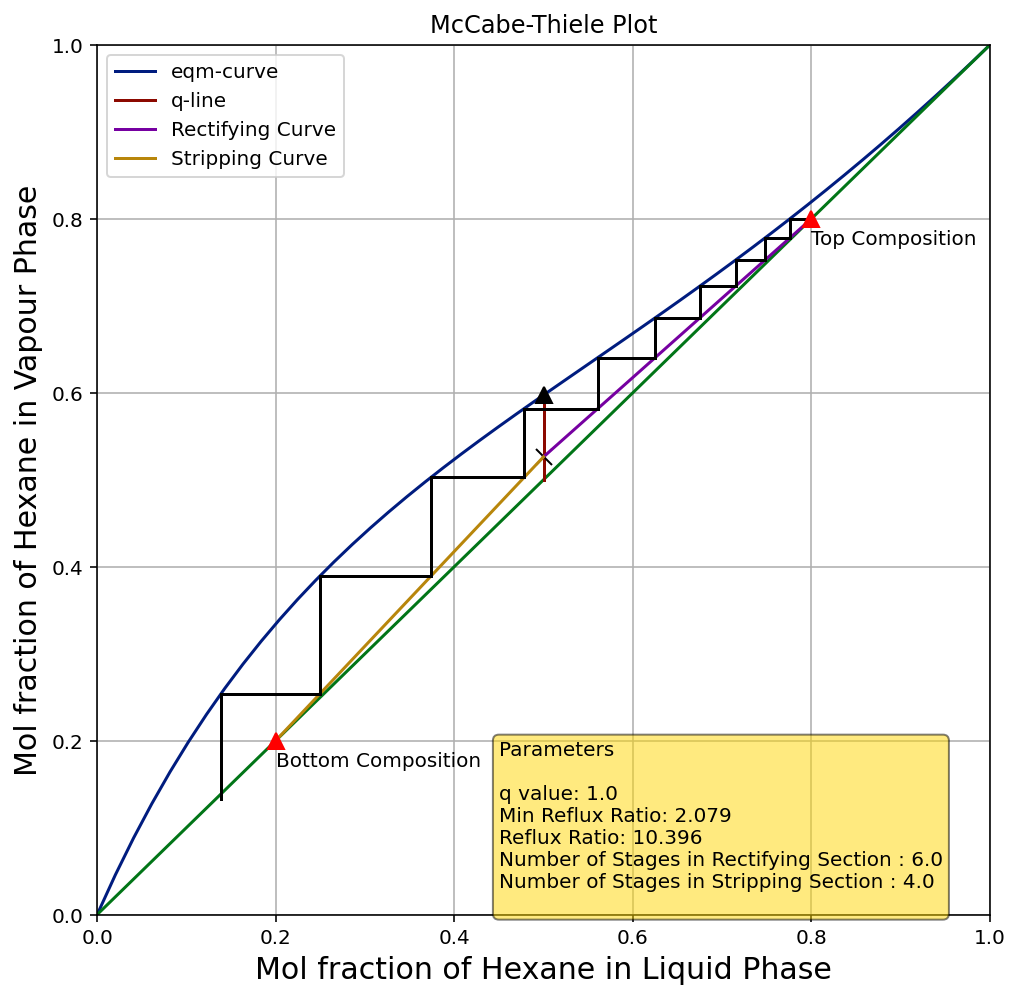

In [7]:
dist.num_stages()

In [8]:
time = 0.3  #hr
dist.simulate_transient(time)

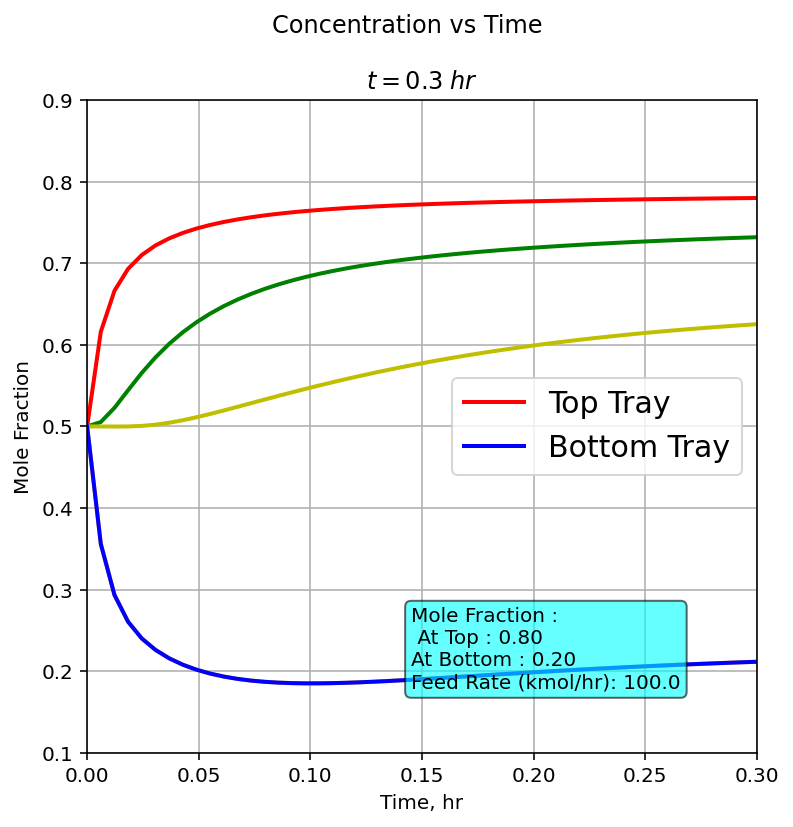

In [9]:
dist.show_anim()     
name = 'distillation_'+str(dist.names_list[0])+'_'+str(dist.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

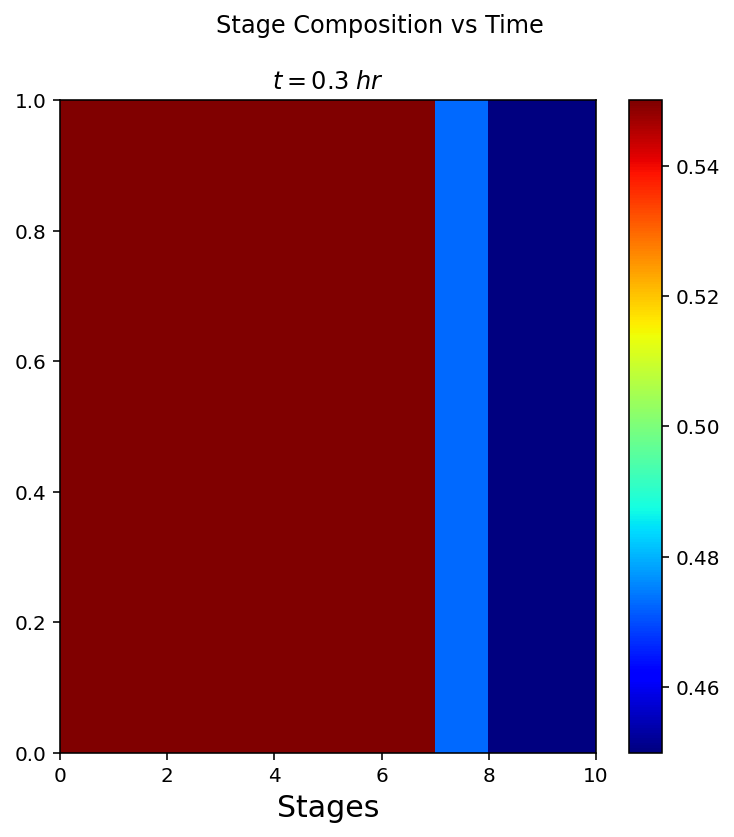

In [10]:
dist.animate_stage()     
name = 'distillation_stage'+str(dist.names_list[0])+'_'+str(dist.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

### The method duty_req will calculate the amount of Cooling Water required for Condensation and Amount of Steam needed in the Reboiler <br> The argument TCW is a list where we enter the input and output temperature of cooling water as we want it to be

In [11]:
dist.duty_req(TCW = [25,80])

### The method show_distillation_chars() will return a table with all the features of the distillation column

In [12]:
dist.show_distillation_chars()

,Parameter,Value
0,Feed Flowrate (kmol/hr),100.000000
1,Feed Composition,0.500000
2,Top Product Flowrate (kmol/hr),50.000000
3,Top Product Composition,0.800000
4,Bottom Product Flowrate (kmol/hr),50.000000
5,Bottom Product Composition,0.200000
6,Feed Quality (q),1.000000
7,Minimum Reflux Ratio,2.079104
8,Actual Reflux Ratio,10.395522
9,Number of Stages needed,10.000000


# Cooling tower design to cool the water coming from the Condensor

### The method start_cooling() will initialize the variables required to execute the Cooling Tower design.

In [13]:
dist.start_cooling()

### The method show_sat_curve shows the Saturation enthalpy of Air in the given temperature range

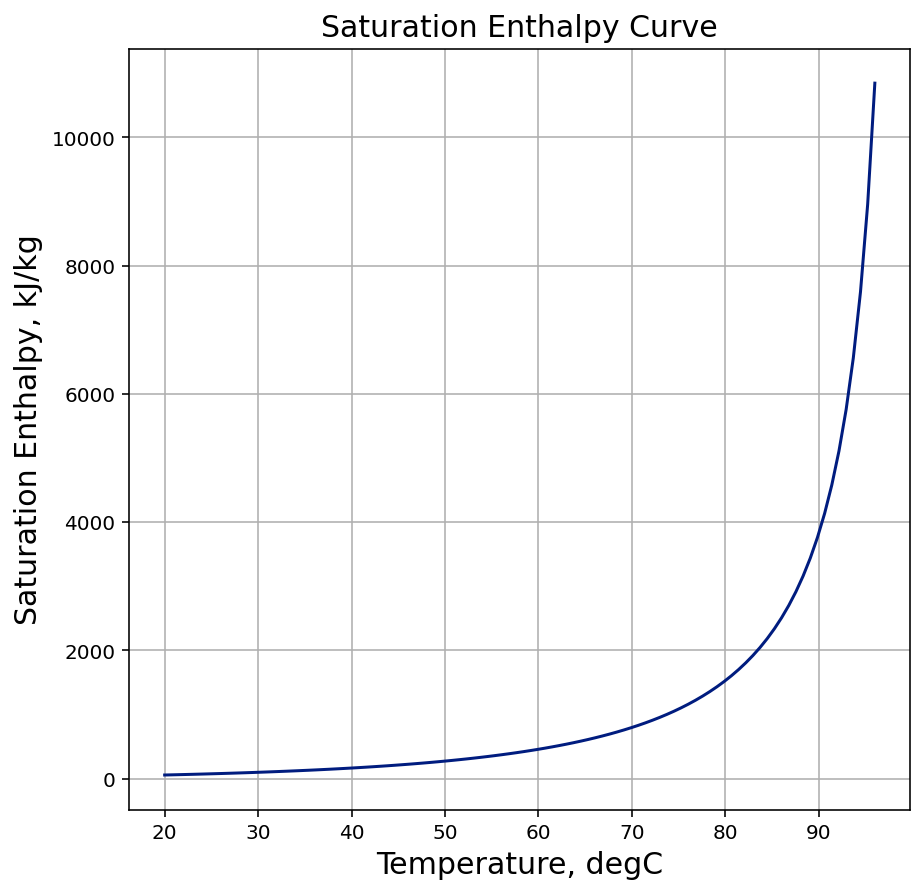

In [14]:
dist.show_sat_curve()

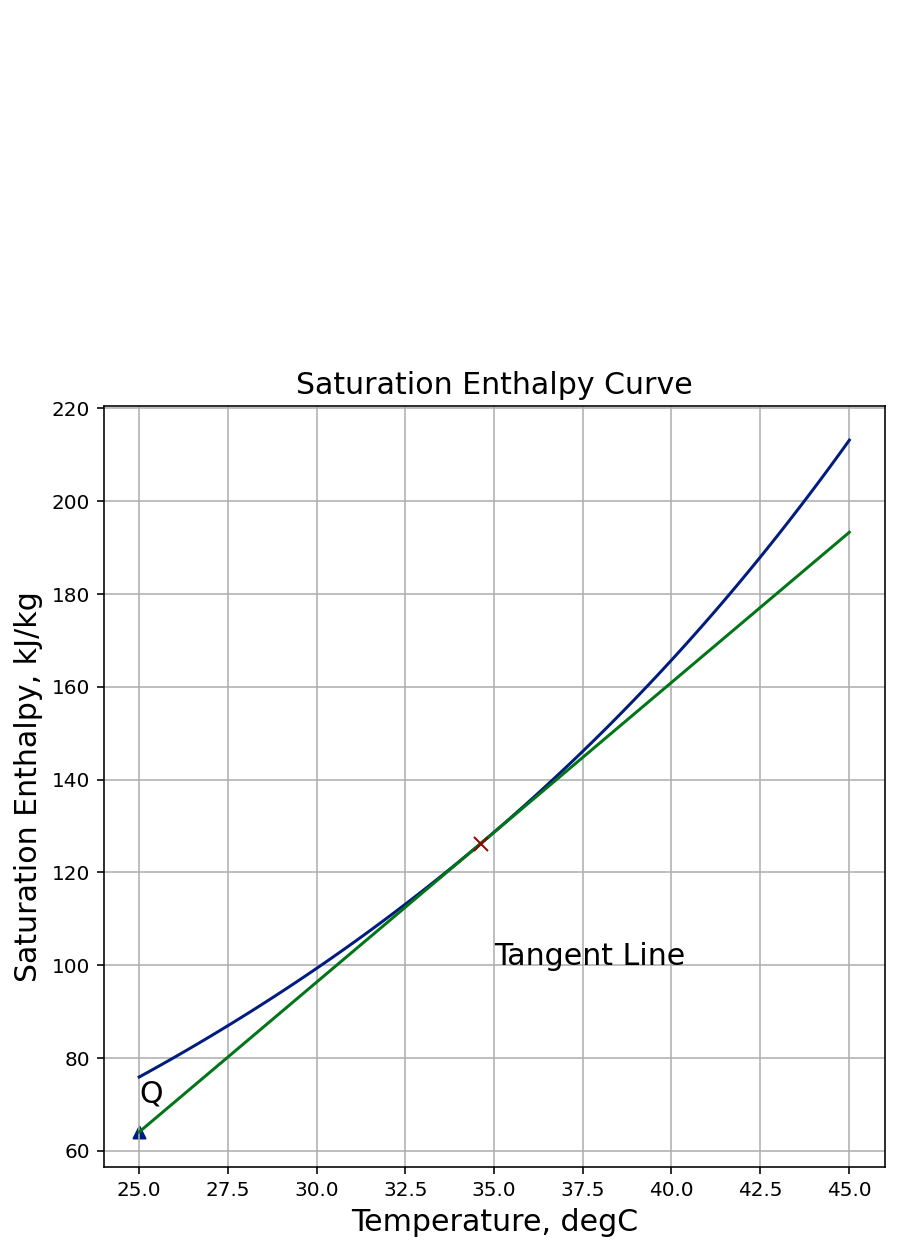

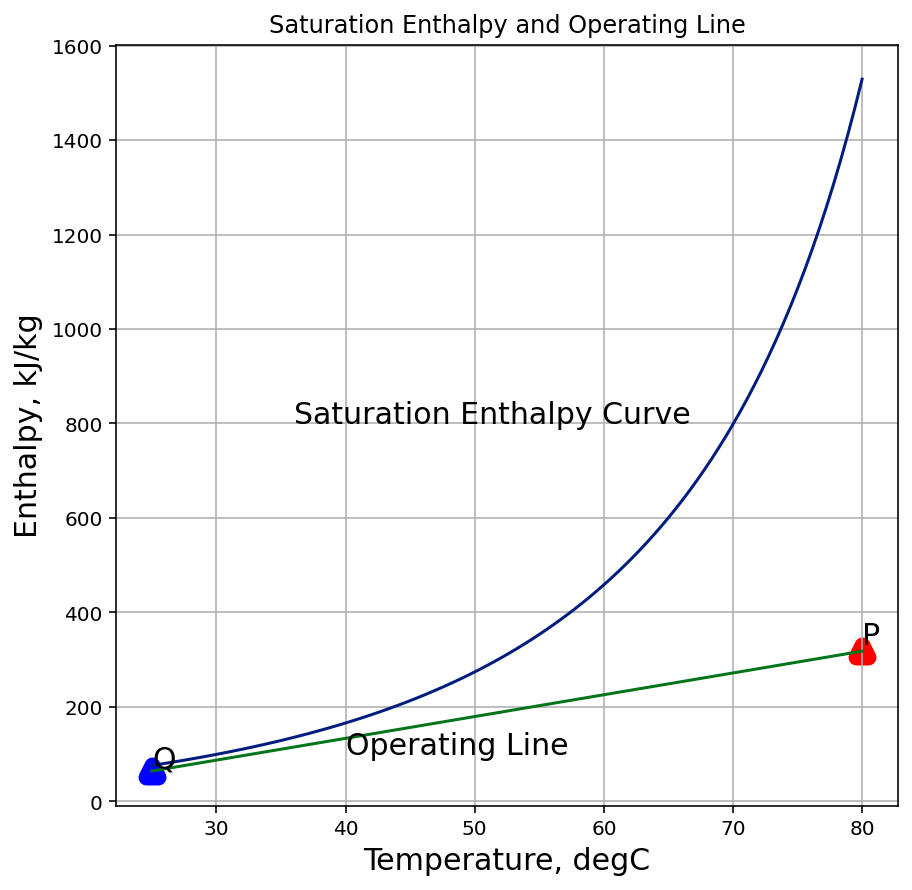

In [15]:
dist.show_tangent()
dist.show_cool_opline()

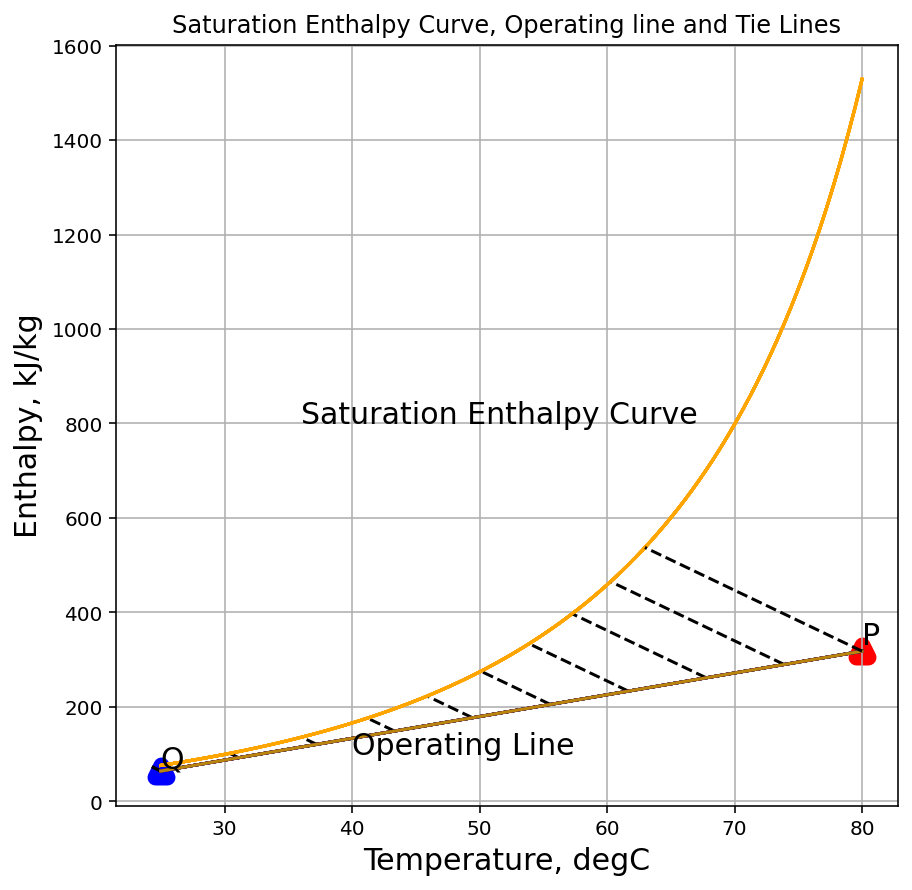

In [16]:
dist.show_tieline()

In [17]:
dist.calc_ntu_htu()

### Again, to show the properties of Cooling tower in a table, we use the show_cooling_tower_chars() method

In [18]:
dist.show_cooling_tower_chars()

,Design Parameter,Value
0,Inlet Water Temperature (degC),80
1,Outlet Water Temperature (degC),25
2,Inlet Air Dry bulb Temperature (degC),31
3,Inlet Air Wet bulb Temperature (degC),22
4,Inlet Water Flowrate (kg/m^2hr),4657.365627
5,Inlet Air Flowrate (kg/m^2hr),[4217.897327684422]
6,NTU,3.640663
7,HTU,[0.7029828879474036]
8,Tower Height (m),[2.5593239991695556]


## Trying for one more system

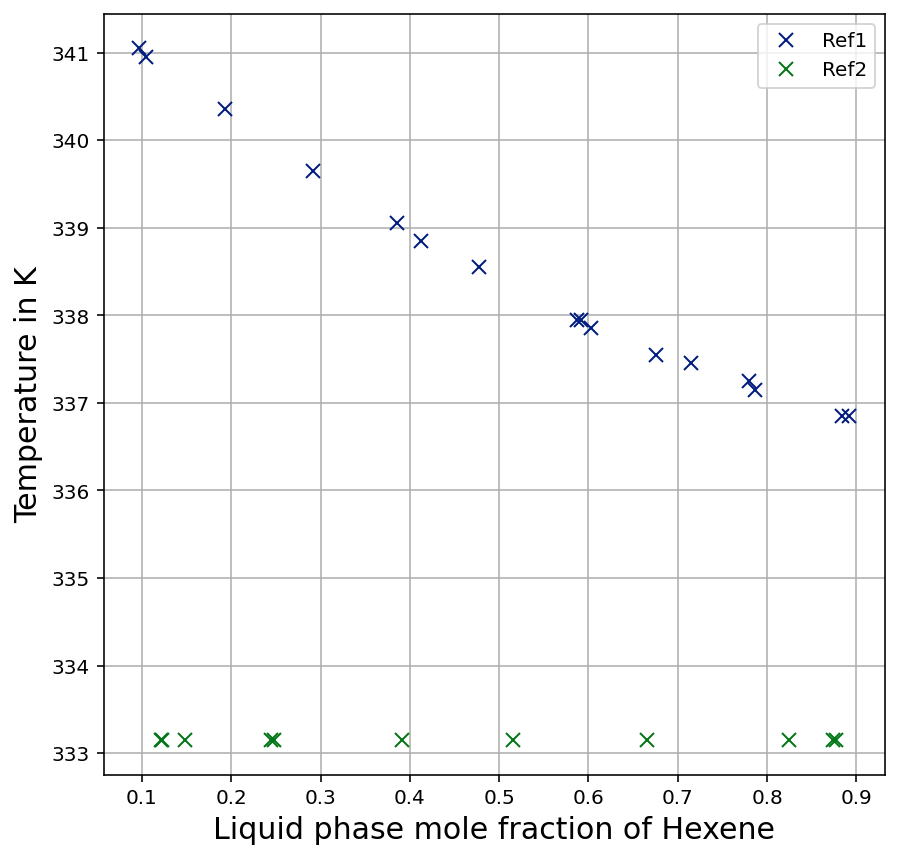

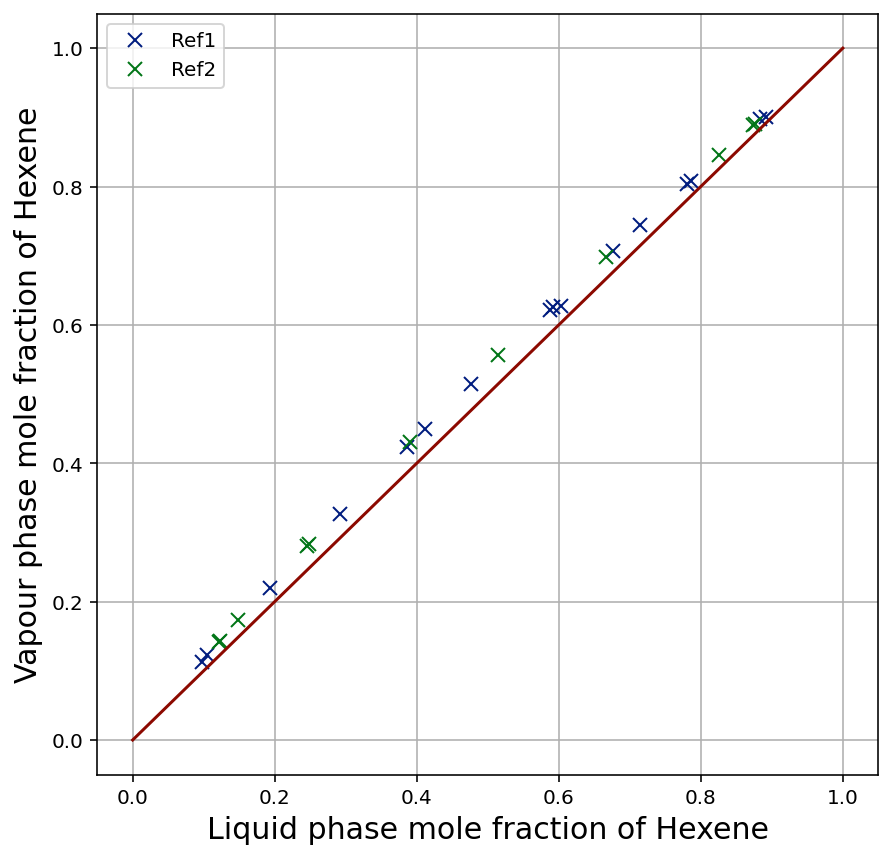

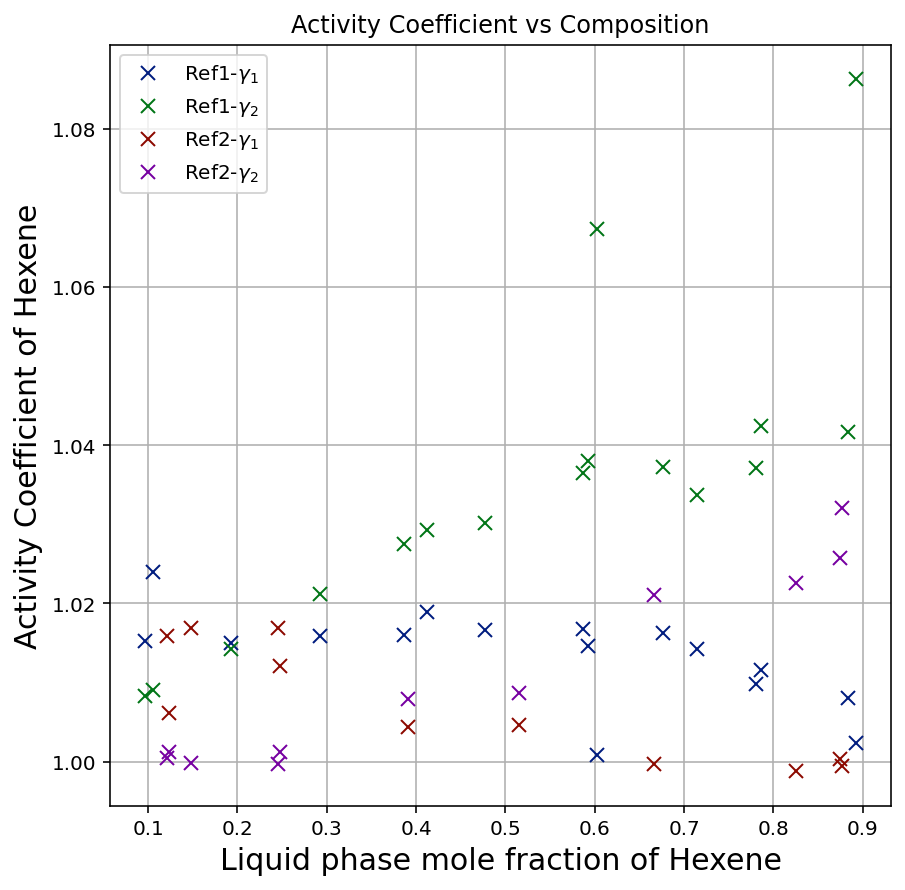

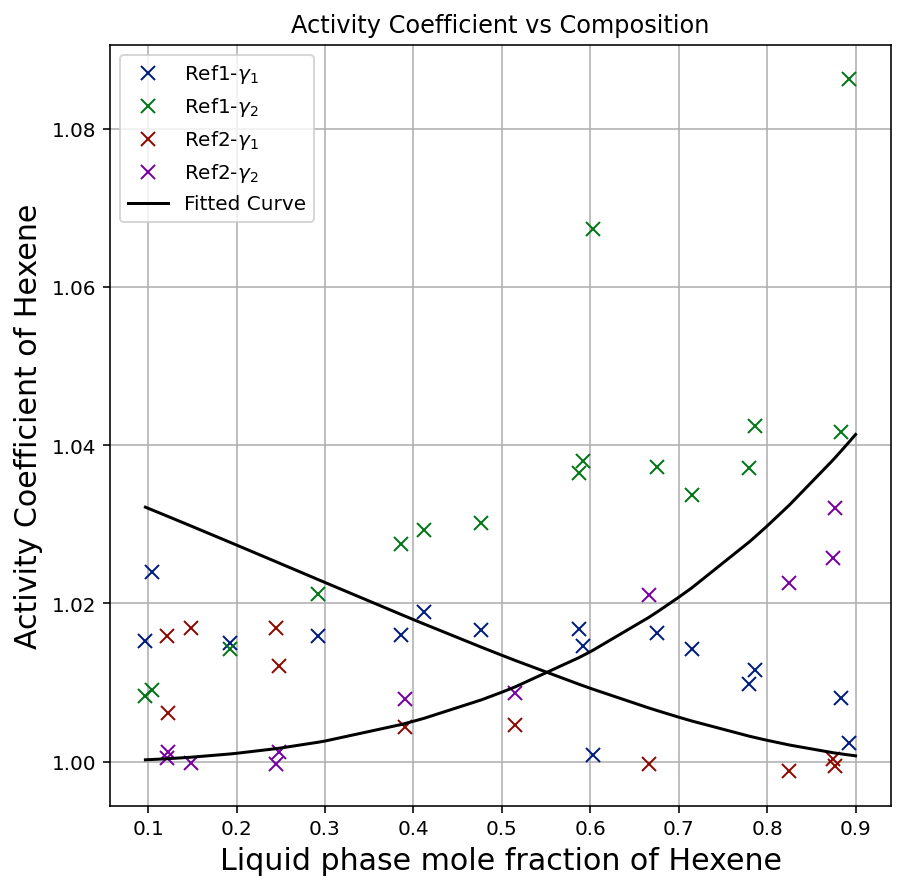

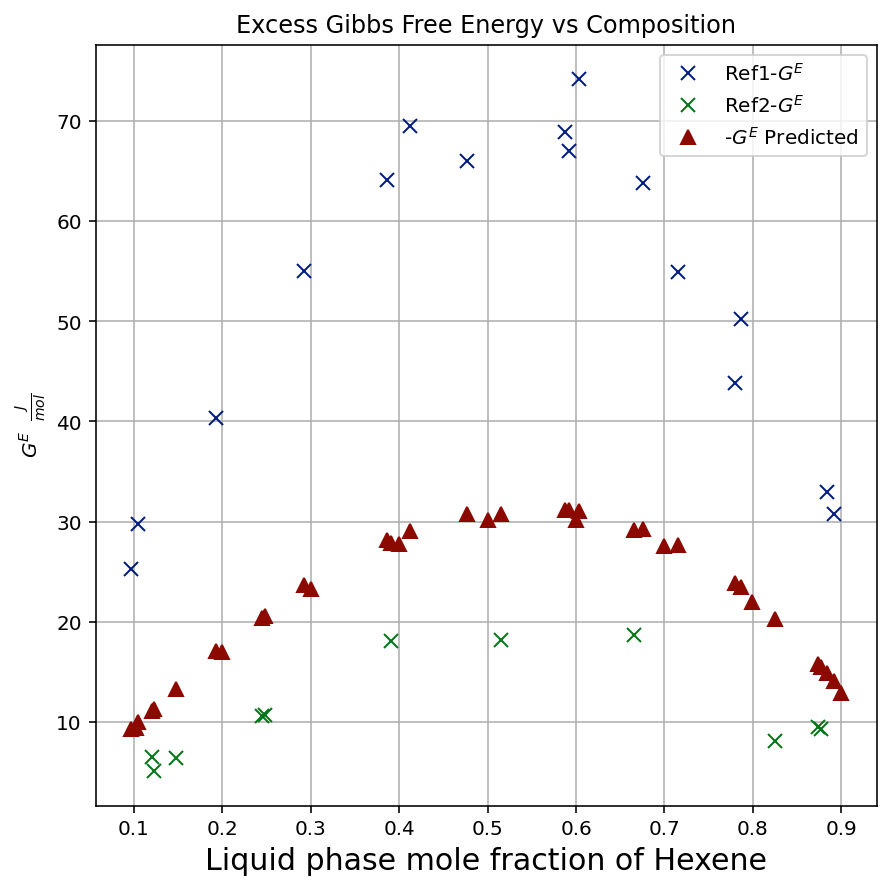

In [19]:
df_vle2 = pd.read_excel('hexane_hexene_VLE.xlsx', usecols = 'A:E')
VLEObj2 = AnalyzeVLE(['1-Hexene', 'n-Hexane'], df_vle2)
VLEObj2.initialize_reading()
VLEObj2.process_data(ref_no = 2)
VLEObj2.visualize_data()
VLEObj2.get_expt_gamma()
nrtl2, params2, cost2 = VLEObj2.fit_nrtl()
VLEObj2.observe_fit()


In [20]:
Hexene = purecomponentdata.Compound("1-Hexene")  # More volatile component, (1)
Hexane = purecomponentdata.Compound("n-Hexane")  # Lesser volatile component, (2)

dict_compounds2 = {"Hexene":Hexene, "Hexane":Hexane} # Define the dictionary

In [21]:
dist2 = BinaryDistillation(nrtl2, dict_compounds2)
dist2.xd = 0.75
dist2.xf = 0.5
dist2.q = 0.8
dist2.R = 4

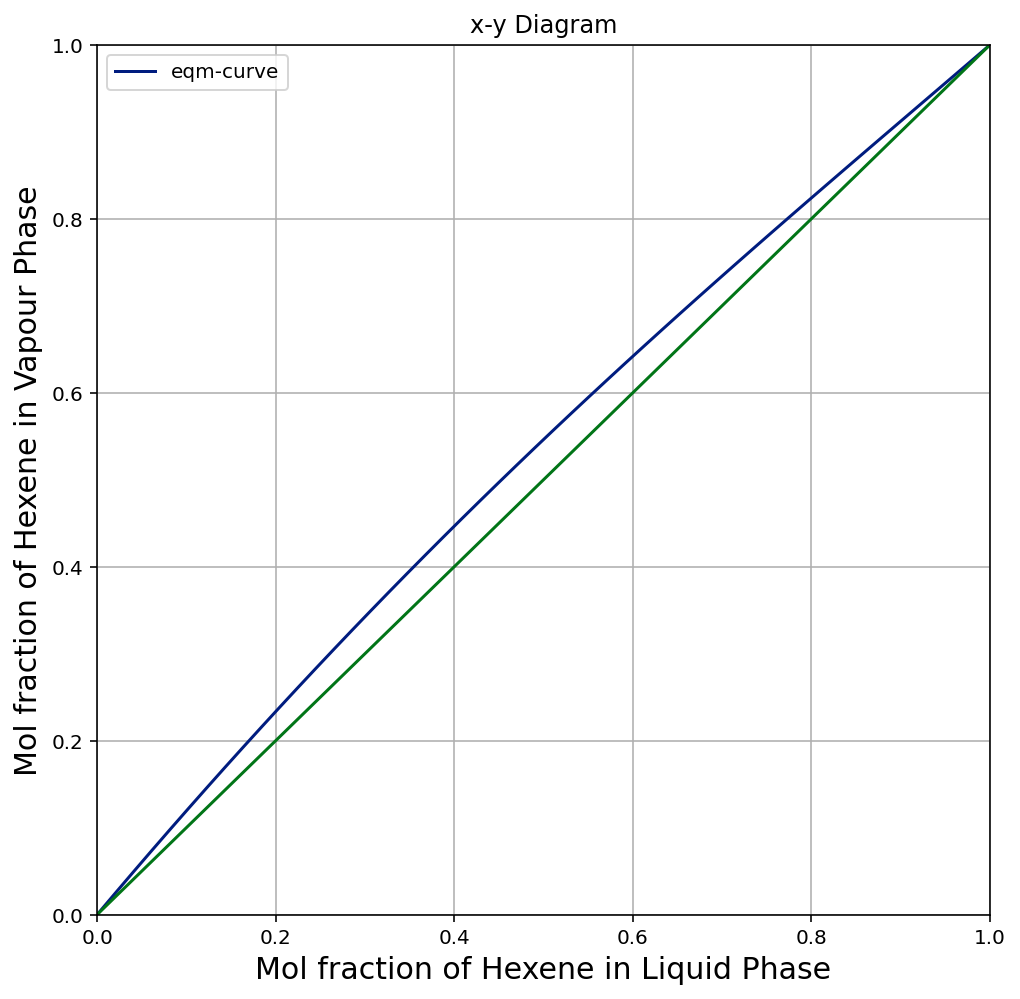

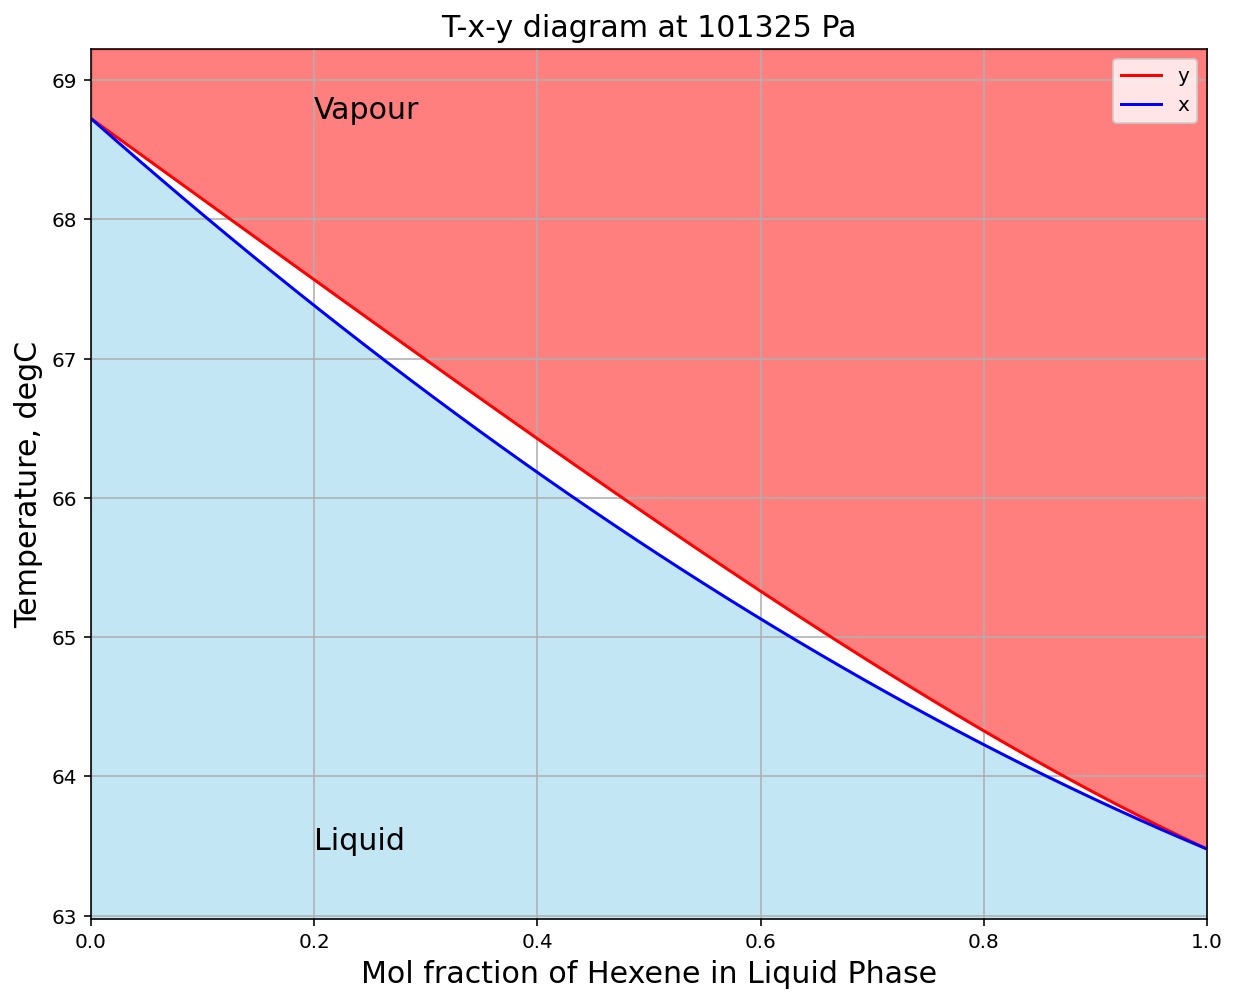

In [22]:
dist2.show_xy()
dist2.show_txy()

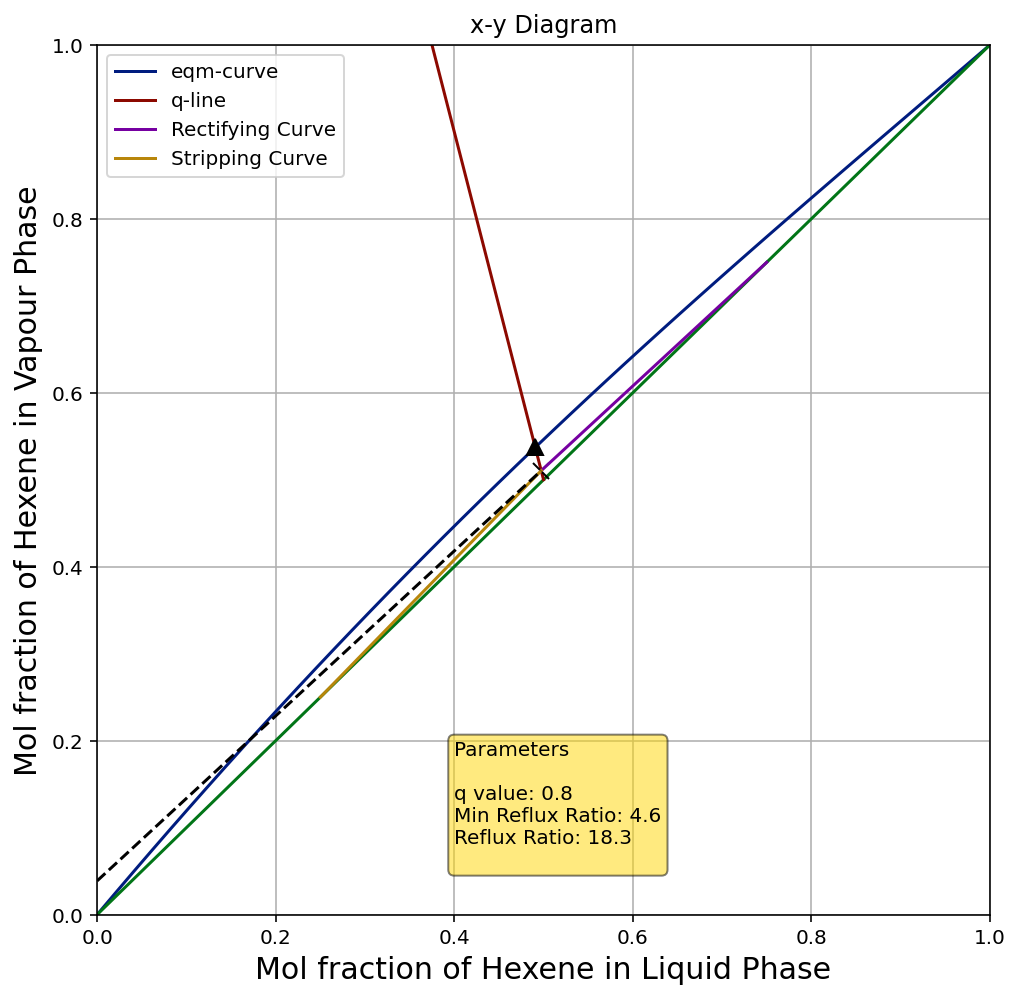

In [23]:
dist2.show_opline()

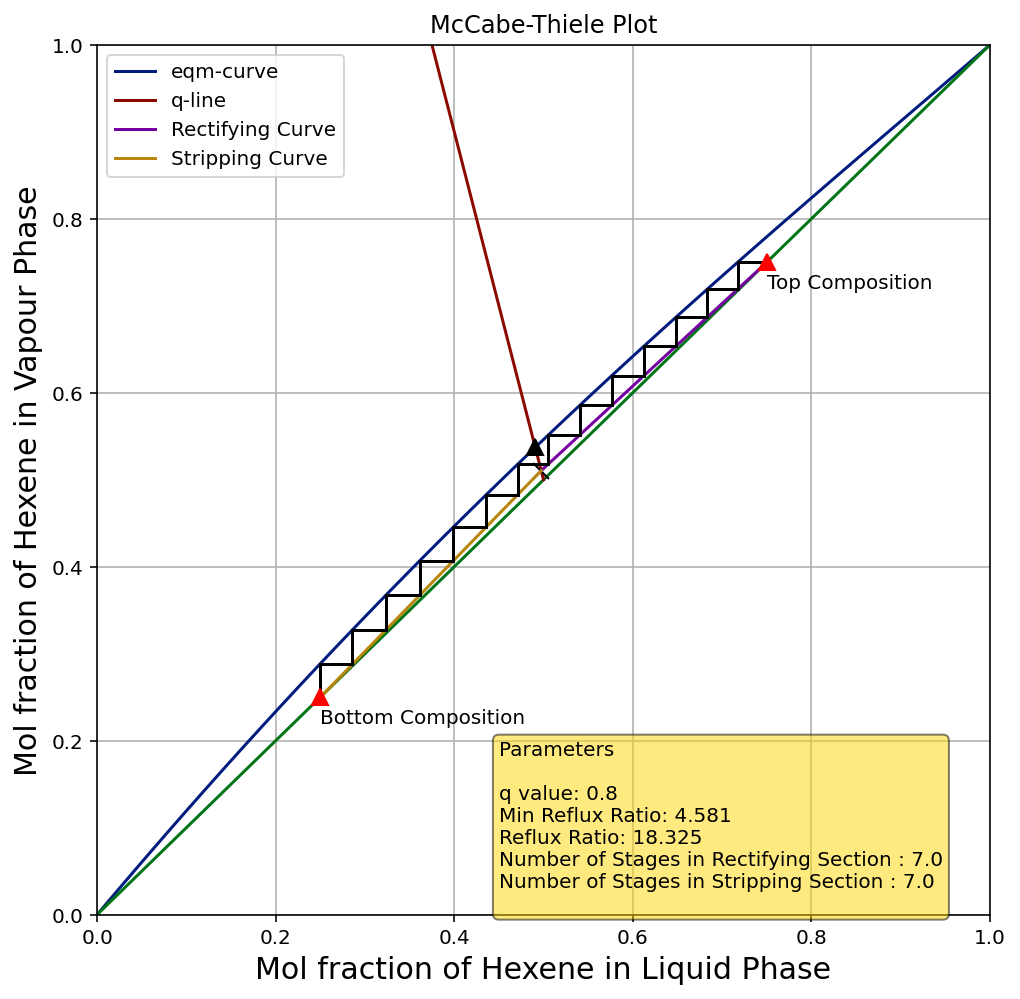

In [24]:
dist2.num_stages()

In [25]:
time = 0.3  #hr
dist2.simulate_transient(time)

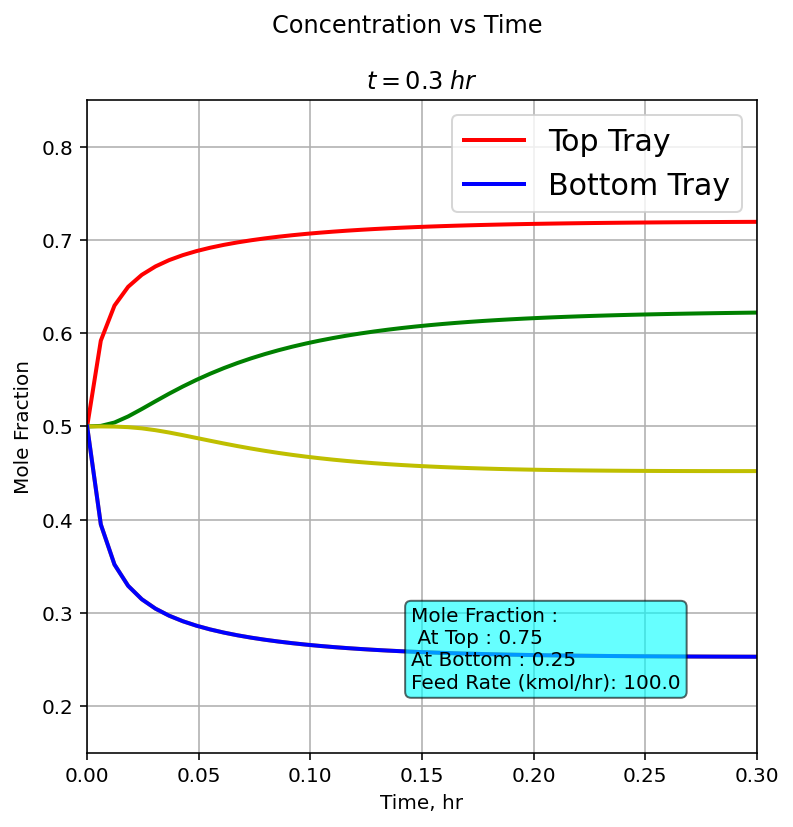

In [26]:
dist2.show_anim()     
name = 'distillation_'+str(dist2.names_list[0])+'_'+str(dist2.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

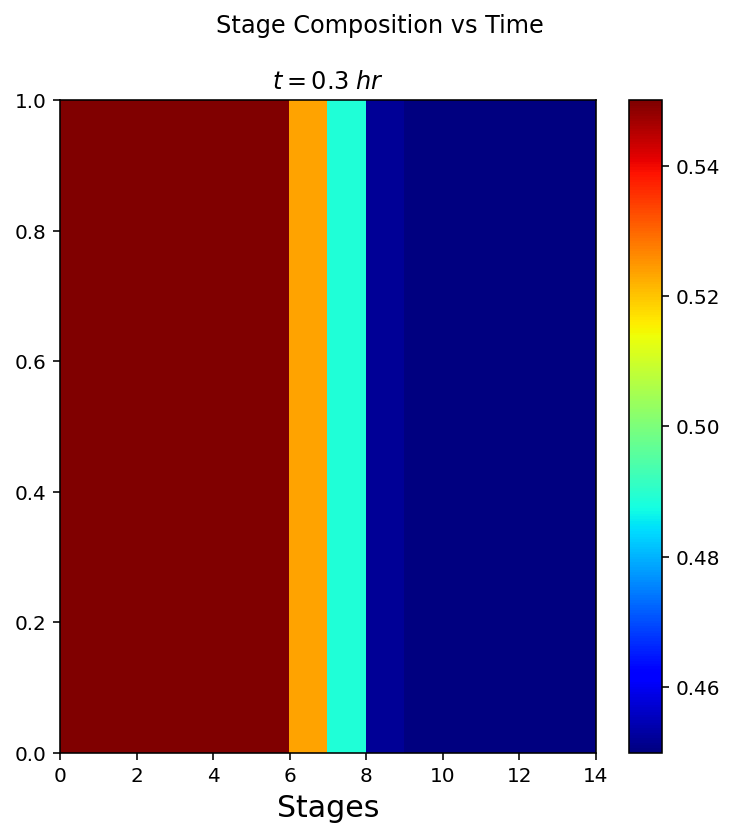

In [27]:
dist2.animate_stage()     
name = 'distillation_stage'+str(dist2.names_list[0])+'_'+str(dist2.names_list[1])+'.gif' 
IPdisplay.Image(url=name)

In [28]:
dist2.duty_req(TCW = [25,80])

In [29]:
dist2.show_distillation_chars()

,Parameter,Value
0,Feed Flowrate (kmol/hr),100
1,Feed Composition,0.5
2,Top Product Flowrate (kmol/hr),50.0
3,Top Product Composition,0.75
4,Bottom Product Flowrate (kmol/hr),50.0
5,Bottom Product Composition,0.25
6,Feed Quality (q),0.8
7,Minimum Reflux Ratio,[4.581286828954463]
8,Actual Reflux Ratio,[18.32514731581785]
9,Number of Stages needed,14


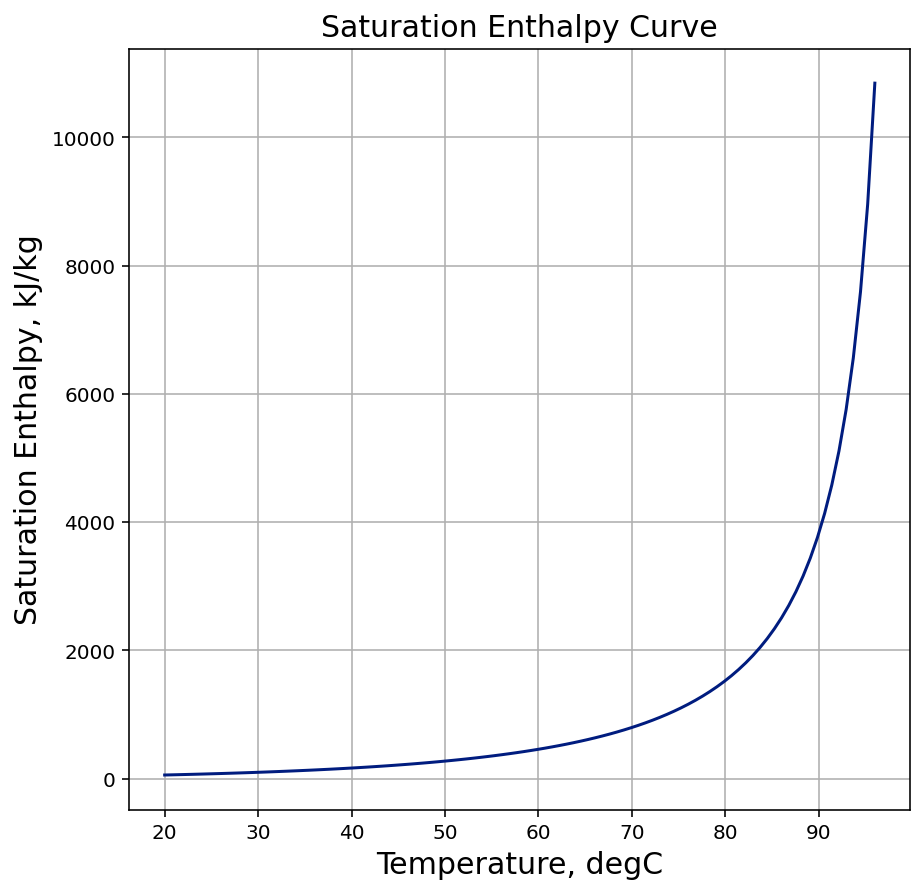

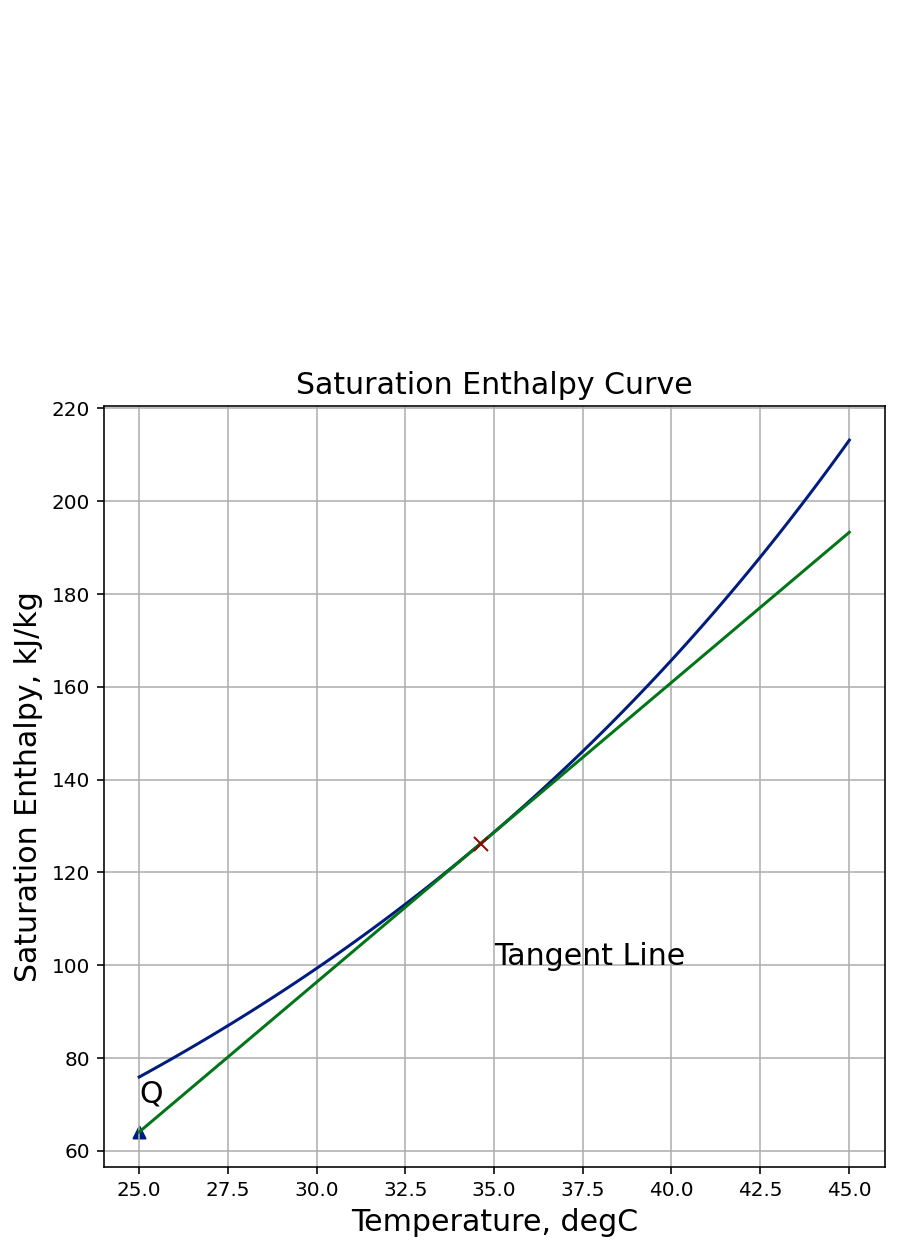

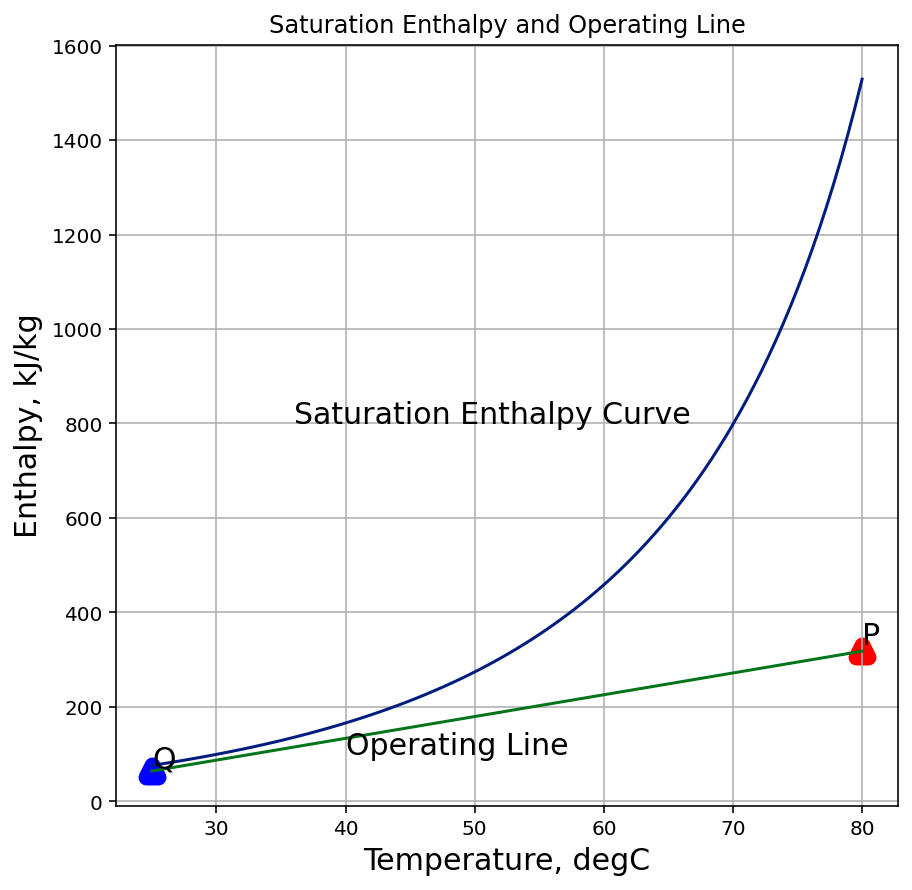

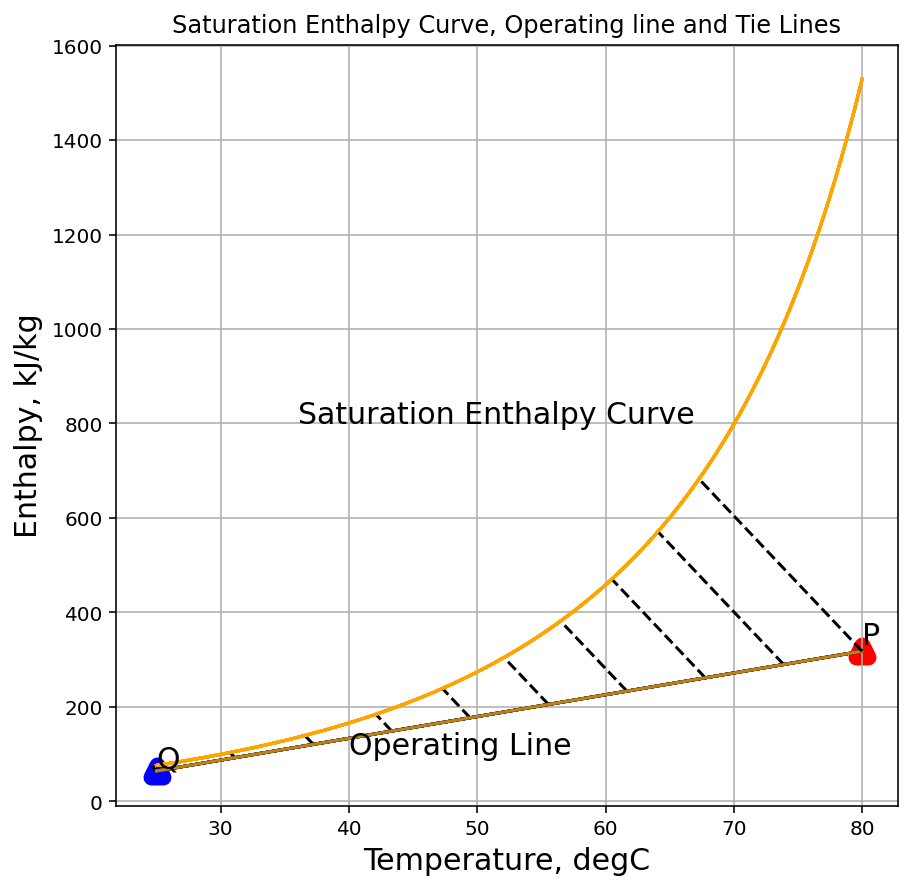

In [30]:
dist2.start_cooling()
dist2.show_sat_curve()
dist2.show_tangent()
dist2.show_cool_opline()
dist2.show_tieline()

In [31]:
dist2.calc_ntu_htu()

In [32]:
dist2.show_cooling_tower_chars()

,Design Parameter,Value
0,Inlet Water Temperature (degC),80
1,Outlet Water Temperature (degC),25
2,Inlet Air Dry bulb Temperature (degC),31
3,Inlet Air Wet bulb Temperature (degC),22
4,Inlet Water Flowrate (kg/m^2hr),[7907.610059899081]
5,Inlet Air Flowrate (kg/m^2hr),[7161.449199514218]
6,NTU,2.922178
7,HTU,[1.1935748665857029]
8,Tower Height (m),[3.4878377893652948]
